## Tennis Time

- Game is becoming longer and longer (don't have cross year data)
- ~~Game length per player~~
- ~~Some Game Moment are longer than the other (i.e. deuce?)~~
- Game length per years (Don't have data)


- start time: 09:40; 50mins

- the original fivethirtyeight [piece](http://fivethirtyeight.com/features/why-some-tennis-matches-take-forever/) has some interesting line chart
- TODO: make a table display
- Apart from top/bottom, it's also a good idea to have some 'hightlight'

In [2]:
import numpy as np
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.library['fivethirtyeight']['axes.prop_cycle']



'#30a2da'
'#fc4f30'
'#e5ae38'
'#6d904f'
'#8b8b8b'


In [7]:
from IPython.core.display import display, HTML
from string import Template
import json


In [79]:

def head_tail_bar (data):
    absmax = max(list(map(abs, [data['x'].max(), data['x'].min()])))
    plt.xlim(-absmax, absmax)
    g = sns.barplot(data=data.head(n=10), orient='h', x='x', y='y', color='#30a2da')
    plt.axvline(data['x'].mean(), color='#fc4f30',linestyle='dashed', linewidth=2)
    g.set_title("Top 10 \n (red is average)")
    plt.show()
    
    plt.xlim(-absmax, absmax)
    g = sns.barplot(data=data.tail(n=10), orient='h', x='x', y='y', color='#30a2da')
    plt.axvline(data['x'].mean(), color='#fc4f30',linestyle='dashed', linewidth=2)
    g.set_title("Bottom 10 \n (red is average)")
    plt.show()


In [77]:
players = pd.read_csv("./data/data/tennis-time/players_time.csv")
players.head()

,player,seconds_added_per_point
0,Dustin Brown,-6.37
1,Rohan Bopanna,-4.95
2,Chris Guccione,-4.63
3,Benoit Paire,-4.56
4,Lukas Dlouhy,-4.35


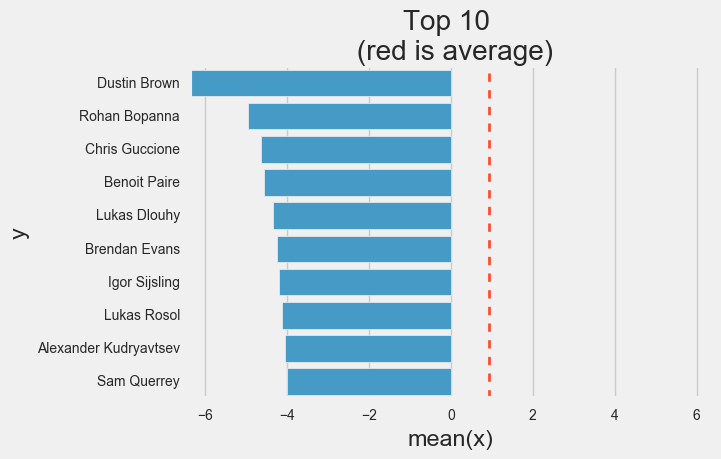

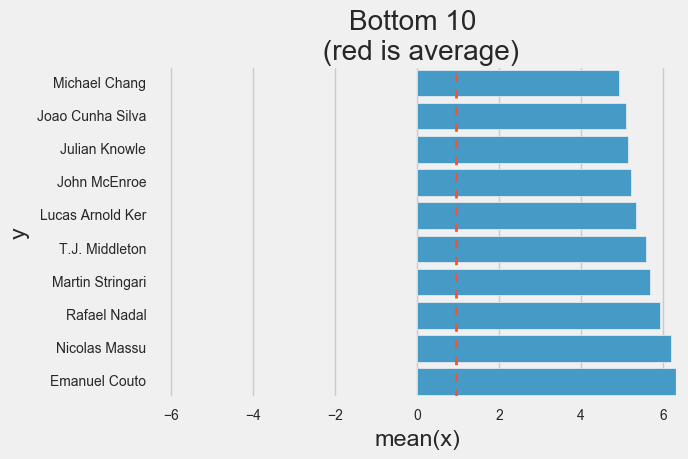

In [80]:
tmp_players = players.copy()
tmp_players.columns = ['y', 'x']
head_tail_bar(tmp_players)

In [91]:
serve = pd.read_csv("./data/data/tennis-time/serve_times.csv")
serve.head(n=10)

,server,seconds_before_next_point,day,opponent,game_score,set,game
0,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-30,1,0-0
1,Nicolas Almagro,19,28-May-15,Rafael Nadal,15-40,1,0-0
2,Nicolas Almagro,23,28-May-15,Rafael Nadal,30-40,1,0-0
3,Nicolas Almagro,24,28-May-15,Rafael Nadal,Deuce,1,0-0
4,Nicolas Almagro,19,28-May-15,Rafael Nadal,Ad-in,1,0-0
5,Pablo Andujar,34,28-May-15,Philipp Kohlschreiber,40-30,5,2-4
6,Bernard Tomic,21,28-May-15,Thanasi Kokkinakis,30-40,3,0-1
7,Bernard Tomic,17,28-May-15,Thanasi Kokkinakis,Deuce,3,0-1
8,Bernard Tomic,17,28-May-15,Thanasi Kokkinakis,Ad-in,3,0-1
9,Rafael Nadal,34,28-May-15,Nicolas Almagro,15-30,1,0-1


## Some Game Moment Are Longer Than The Others?
- expectinng deuce to be longer; but it's actually when it's `0-30`

In [93]:
serve.pivot_table(index='game_score', values='seconds_before_next_point')

game_score
0-15      13.666667
0-30      29.333333
0-40      14.000000
15-0      17.250000
15-15     15.500000
15-30     23.600000
15-40     25.428571
30-0      19.800000
30-15     14.500000
30-30     21.333333
30-40     22.777778
40-0      19.714286
40-15     16.500000
40-30     22.545455
Ad-in     18.111111
Ad-out    23.857143
Deuce     19.176471
Name: seconds_before_next_point, dtype: float64

### - No set 4; only the first winning 3; or first to 5

In [96]:
serve.pivot_table(index='set', values='seconds_before_next_point')

set
1    22.333333
2    19.727273
3    18.415385
5    30.666667
Name: seconds_before_next_point, dtype: float64

In [97]:
serve.pivot_table(index='game', values='seconds_before_next_point')

game
0-0    20.909091
0-1    24.714286
0-3    29.500000
0-5    14.000000
1-2    24.500000
1-3    20.750000
1-4    32.000000
2-1    18.833333
2-2    19.166667
2-4    24.333333
3-1    15.400000
3-3    13.428571
3-5    17.625000
4-2    19.500000
4-3    27.000000
4-4    30.200000
5-1    27.000000
5-2    16.375000
5-4    26.000000
Name: seconds_before_next_point, dtype: float64

In [82]:
events = pd.read_csv("./data/data/tennis-time/events_time.csv")
events.head()


,tournament,surface,seconds_added_per_point,years
0,Wimbledon,Grass,-2.98,1991-2014
1,London Olympics,Grass,-2.62,2012
2,Manchester,Grass,-2.33,1991-1994
3,Eastbourne,Grass,-1.78,2009-2014
4,Birmingham,Carpet,-1.63,1991


In [83]:
events.pivot_table(index='surface')

,seconds_added_per_point
surface,
Carpet,0.772895
Clay,3.135211
Grass,-1.333000
Hard,1.424767
